# A report on Convert model *yolov5s-seg.pt* to *ncnn* and test the converted model using C++
## Reporter : Ngô Văn Cảnh
## Date : 5 May 2023
## Work progress : 100% ( finished )

## 1. Convert model *yolov5s-seg.pt* to *yolov5s-seg.torchscript* using **export.py**

In [1]:
import torch
import utils
import os
display = utils.notebook_init()  # checks

YOLOv5  v7.0-142-g6764eb2 Python-3.11.4 torch-2.0.1+cpu CPU


Setup complete  (8 CPUs, 7.8 GB RAM, 187.2/244.1 GB disk)


In [2]:
!python export.py --weights weights/segment/yolov5s-seg.pt --include torchscript --data data/coco128-seg.yaml

export: data=data/coco128-seg.yaml, weights=['weights/segment/yolov5s-seg-idcard-2.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5  v7.0-141-g9976991 Python-3.10.6 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 165 layers, 7411907 parameters, 0 gradients, 25.7 GFLOPs

PyTorch: starting from weights\segment\yolov5s-seg-idcard-2.pt with output shape (1, 25200, 43) (14.5 MB)

TorchScript: starting export with torch 2.0.0+cpu...
TorchScript: export success  4.1s, saved as weights\segment\yolov5s-seg-idcard-2.torchscript (28.8 MB)

Export complete (5.4s)
Results saved to C:\Users\Admin\Projects\Random_Project\ID\yolov5\weights\segment
Detect:          python segment\predict.py --weights weights\segment\yolov5s-seg-idcard

## 2. Test the converted torchscript model using **predict.py**

In [41]:
!python segment/predict.py --weights weights/segment/yolov5s-seg.pt --source ../input/cat.jpg --save-txt --save-conf

segment\predict: weights=['weights/segment/yolov5s-seg.pt'], source=../input/cat.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5  v7.0-141-g9976991 Python-3.10.6 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 C:\Users\Admin\Projects\Random_Project\ID\input\cat.jpg: 640x640 1 cat, 1 wine glass, 1 cup, 1 fork, 1 bowl, 363.8ms
Speed: 4.2ms pre-process, 363.8ms inference, 17.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\predict-seg\exp3
1 labels saved to runs\predict-seg\exp3\labels


In [18]:
!python segment/predict.py --weights weights/segment/yolov5s-seg.torchscript --source ../input/test.bmp --agnostic-nms --save-txt --save-conf

segment\predict: weights=['weights/segment/yolov5s-seg.torchscript'], source=../input/test.bmp, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=True, augment=False, visualize=False, update=False, project=runs\predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5  v7.0-141-g9976991 Python-3.10.6 torch-2.0.0+cpu CPU

Loading weights\segment\yolov5s-seg.torchscript for TorchScript inference...
image 1/1 C:\Users\Admin\Projects\Random_Project\ID\input\test.bmp: 640x640 1 cat, 564.5ms
Speed: 2.0ms pre-process, 564.5ms inference, 3.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\predict-seg\exp20
1 labels saved to runs\predict-seg\exp20\labels


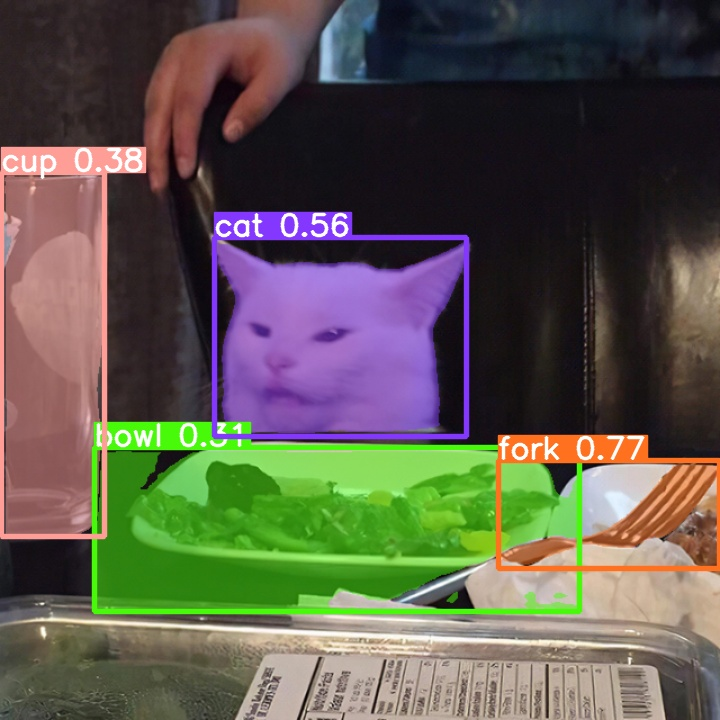

In [5]:
display.Image(filename="../output/exp/cat.jpg")

## 3. Convert model *torchscript* to *ncnn*

In [1]:
!pnnx weights/segment/yolov5s-seg.torchscript inputshape=[1,3,640,640]

pnnxparam = weights/segment/yolov5s-seg.pnnx.param
pnnxbin = weights/segment/yolov5s-seg.pnnx.bin
pnnxpy = weights/segment/yolov5s-seg_pnnx.py
pnnxonnx = weights/segment/yolov5s-seg.pnnx.onnx
ncnnparam = weights/segment/yolov5s-seg.ncnn.param
ncnnbin = weights/segment/yolov5s-seg.ncnn.bin
ncnnpy = weights/segment/yolov5s-seg_ncnn.py
fp16 = 1
optlevel = 2
device = cpu
inputshape = [1,3,640,640]f32
inputshape2 = 
customop = 
moduleop = 
############# pass_level0
inline module = models.common.Bottleneck
inline module = models.common.C3
inline module = models.common.Concat
inline module = models.common.Conv
inline module = models.common.Proto
inline module = models.common.SPPF
inline module = models.yolo.Segment
inline module = models.common.Bottleneck
inline module = models.common.C3
inline module = models.common.Concat
inline module = models.common.Conv
inline module = models.common.Proto
inline module = models.common.SPPF
inline module = models.yolo.Segment

----------------

##########

## 4. Edit *yolov5s-seg.ncnn.param* file

```diff
  7767517
- 223 257
+ 224 258

- Convolution              conv_69                  1 1 152 200 0=351 1=1 11=1 12=1 13=1 14=0 2=1 3=1 4=0 5=1 6=44928
- Reshape                  view_141                 1 1 200 201 0=80 1=80 11=117 2=3
+ Convolution              conv_69                  1 1 152 out1 0=351 1=1 11=1 12=1 13=1 14=0 2=1 3=1 4=0 5=1 6=44928
+ Reshape                  view_141                 1 1 out1 201 0=80 1=80 11=117 2=3

- Convolution              conv_70                  1 1 171 217 0=351 1=1 11=1 12=1 13=1 14=0 2=1 3=1 4=0 5=1 6=89856
- Reshape                  view_142                 1 1 217 218 0=40 1=40 11=117 2=3
+ Convolution              conv_70                  1 1 171 out2 0=351 1=1 11=1 12=1 13=1 14=0 2=1 3=1 4=0 5=1 6=89856
+ Reshape                  view_142                 1 1 out2 218 0=40 1=40 11=117 2=3

- Convolution              conv_71                  1 1 234 235 0=351 1=1 11=1 12=1 13=1 14=0 2=1 3=1 4=0 5=1 6=179712
- Reshape                  view_143                 1 1 235 236 0=20 1=20 11=117 2=3
+ Convolution              conv_71                  1 1 234 out3 0=351 1=1 11=1 12=1 13=1 14=0 2=1 3=1 4=0 5=1 6=179712
+ Reshape                  view_143                 1 1 out3 236 0=20 1=20 11=117 2=3

- Swish                    silu_134                 1 1 199 out1
+ Swish                    silu_134                 1 1 199 out-seg
+ Reshape                  custom_layer             1 1 out-seg seg 0=-1 1=32
```

## 5. Test model NCNN

In [7]:
!yoloncnn --input cat.jpg --model yolov5s-seg.ncnn --dynamic --agnostic --save

5 argument(s) passed
model     = ../models/seg/yolov5s-seg.ncnn.bin
param     = ../models/seg/yolov5s-seg.ncnn.param
input     = ../input/cat.jpg
data      = ../data/coco128.txt
size      = 640
conf      = 0.25
nms       = 0.45
dynamic   = 1
save      = 1
agnostic  = 1
noseg     = 0
------------------------------------------------
objects count = 5

Output saved at ../output/seg/cat.jpg


42 = 0.77578 at 495.73 458.53 223.27 x 109.84 (fork)
15 = 0.55182 at 214.10 236.91 252.80 x 199.27 (cat)
41 = 0.38101 at 1.66 169.76 102.39 x 368.50 (cup)
42 = 0.31867 at 590.31 459.22 125.24 x 86.63 (fork)
45 = 0.30808 at 92.15 443.75 488.70 x 170.90 (bowl)


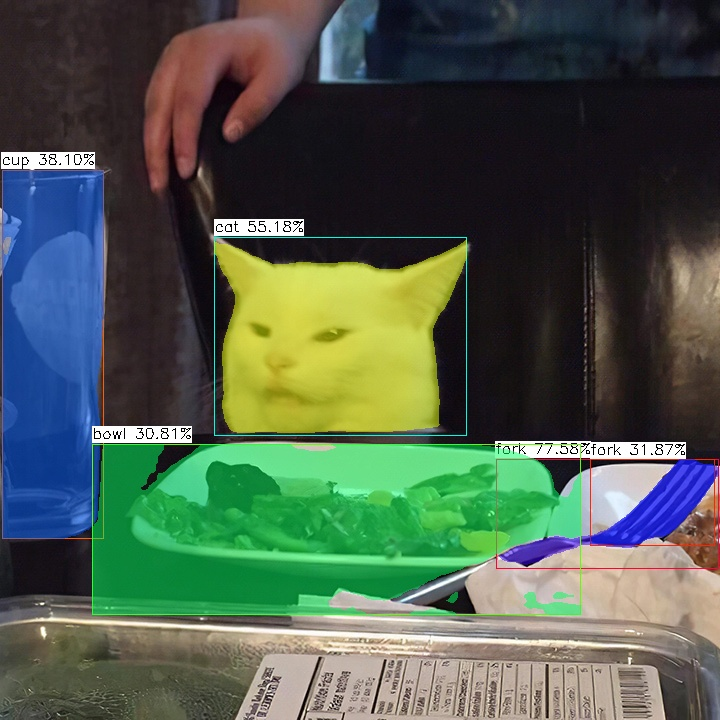

In [7]:
display.Image(filename='../output/seg/cat.jpg')

In [12]:
!yoloncnn --input parking.jpg --model yolov5s-seg.ncnn --dynamic --save

4 argument(s) passed
model     = ../models/seg/yolov5s-seg.ncnn.bin
param     = ../models/seg/yolov5s-seg.ncnn.param
input     = ../input/parking.jpg
data      = ../data/coco128.txt
size      = 640
conf      = 0.25
nms       = 0.45
dynamic   = 1
save      = 1
agnostic  = 0
noseg     = 0
------------------------------------------------
objects count = 27

Output saved at ../output/seg/parking.jpg


2 = 0.88513 at 204.07 441.07 362.98 x 136.97 (car)
2 = 0.87574 at 769.89 206.49 229.25 x 85.65 (car)
0 = 0.87353 at 779.38 562.94 49.97 x 146.99 (person)
0 = 0.85339 at 886.81 535.25 57.33 x 151.51 (person)
2 = 0.84989 at 458.07 159.34 181.78 x 67.96 (car)
0 = 0.82982 at 839.21 550.53 43.50 x 143.79 (person)
0 = 0.81820 at 1109.20 569.19 47.67 x 144.21 (person)
0 = 0.81177 at 728.19 568.25 47.40 x 147.50 (person)
2 = 0.80893 at 553.25 451.62 207.31 x 220.81 (car)
0 = 0.80106 at 680.91 258.02 33.87 x 102.48 (person)
2 = 0.79640 at 0.00 517.04 103.33 x 119.85 (car)
2 = 0.77229 at 0.00 597.66 66.65 x 120.29 (car)
0 = 0.76166 at 606.28 348.39 38.81 x 114.60 (person)
2 = 0.72189 at 840.41 364.27 143.92 x 162.57 (car)
0 = 0.69843 at 629.89 259.19 36.34 x 97.07 (person)
2 = 0.68903 at 879.89 293.45 126.55 x 126.56 (car)
0 = 0.67896 at 811.72 426.14 49.77 x 126.27 (person)
0 = 0.63548 at 762.26 382.40 35.85 x 122.01 (person)
2 = 0.53290 at 288.90 376.26 288.85 x 107.50 (car)
0 = 0.52072 at 797

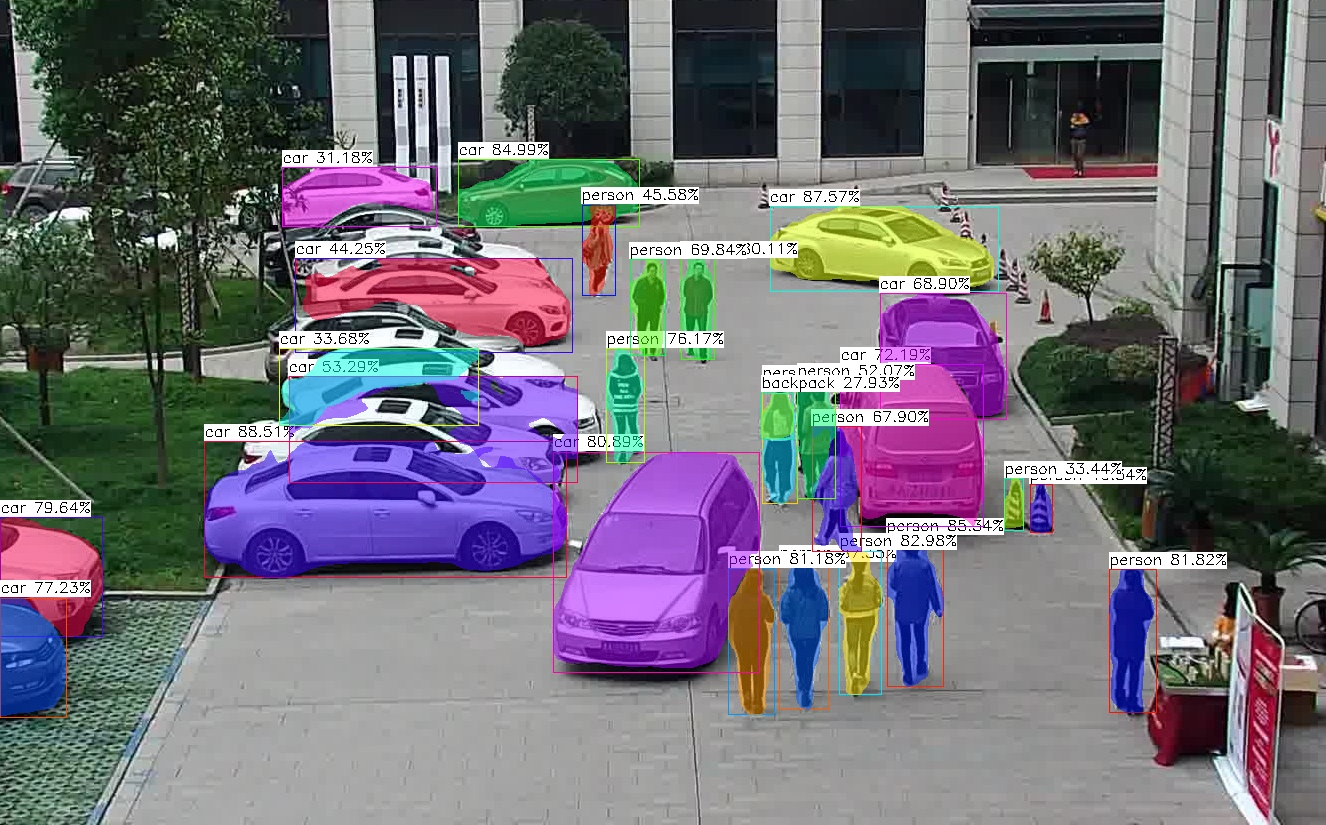

In [13]:
display.Image(filename='../output/seg/parking.jpg')

## 6. Convert model *yolov5s-seg-idcard-best.pt* to *yolov5s-seg-idcard-best.torchscript*

In [2]:
!python export.py --weights weights/segment/yolov5s-seg-idcard-best-2.pt --include torchscript --data PHXGT-1/data.yaml

export: data=PHXGT-1/data.yaml, weights=['weights/segment/yolov5s-seg-idcard-best-2.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5  v7.0-142-g6764eb2 Python-3.11.4 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 165 layers, 7411907 parameters, 0 gradients, 25.7 GFLOPs

PyTorch: starting from weights\segment\yolov5s-seg-idcard-best-2.pt with output shape (1, 25200, 43) (14.5 MB)

TorchScript: starting export with torch 2.0.1+cpu...
TorchScript: export success  3.9s, saved as weights\segment\yolov5s-seg-idcard-best-2.torchscript (28.8 MB)

Export complete (5.2s)
Results saved to D:\Projects\Python\ID\yolov5\weights\segment
Detect:          python segment\predict.py --weights weights\segment\yolov5s-seg-idcard-best-2.t

## 7. Test the converted torchscript model using **predict.py**

In [4]:
!python segment/predict.py --weights weights/segment/yolov5s-seg-idcard-best-2.pt --source ../input/cmnd/ --data PHXGT-1/data.yaml --save-txt --save-conf --save-crop

segment\predict: weights=['weights/segment/yolov5s-seg-idcard-best-2.pt'], source=../input/cmnd/, data=PHXGT-1/data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5  v7.0-142-g6764eb2 Python-3.11.4 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 165 layers, 7411907 parameters, 0 gradients, 25.7 GFLOPs
image 1/42 D:\Projects\Python\ID\input\cmnd\01.jpg: 448x640 2 cccd_backs, 313.5ms
image 2/42 D:\Projects\Python\ID\input\cmnd\02.jpg: 448x640 2 cmt9_fronts, 231.0ms
image 3/42 D:\Projects\Python\ID\input\cmnd\03.jpg: 448x640 2 cmt9_fronts, 239.0ms
image 4/42 D:\Projects\Python\ID\input\cmnd\04.jpg: 448x640 2 cmt9_backs, 256.0ms
imag

In [ ]:
display.Image(filename="../output/exp/cmnd5.jpg")

In [6]:
!python segment/predict.py --weights weights/segment/yolov5s-seg-idcard-best-2.torchscript --source ../input/cmnd/ --project ../output --exist-ok --data PHXGT-1/data.yaml

segment\predict: weights=['weights/segment/yolov5s-seg-idcard-best-2.torchscript'], source=../input/cmnd/, data=PHXGT-1/data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../output, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5  v7.0-142-g6764eb2 Python-3.11.4 torch-2.0.1+cpu CPU

Loading weights\segment\yolov5s-seg-idcard-best-2.torchscript for TorchScript inference...
image 1/42 D:\Projects\Python\ID\input\cmnd\01.jpg: 640x640 2 cccd_backs, 603.6ms
image 2/42 D:\Projects\Python\ID\input\cmnd\02.jpg: 640x640 2 cmt9_fronts, 427.6ms
image 3/42 D:\Projects\Python\ID\input\cmnd\03.jpg: 640x640 2 cmt9_fronts, 335.0ms
image 4/42 D:\Projects\Python\ID\input\cmnd\04.jpg: 640x640 2 cmt9_backs, 340.6ms

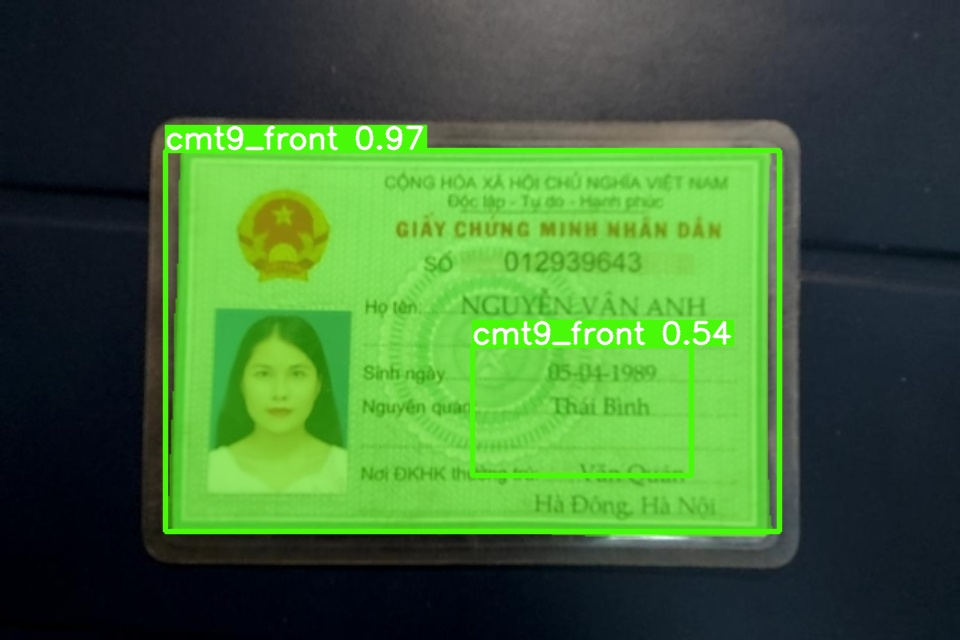

In [7]:
display.Image(filename="../output/exp/cmnd5.jpg")

## 8. Convert model *torchscript* to *ncnn*

In [9]:
!pnnx weights/segment/yolov5s-seg-idcard-best-2.torchscript inputshape=[1,3,640,640]

'pnnx' is not recognized as an internal or external command,
operable program or batch file.


## 9.Edit *yolov5s-seg-idcard-best.ncnn.param* file

```diff
  7767517
- 223 257
+ 224 258

- Convolution              conv_69                  1 1 152 200 0=351 1=1 11=1 12=1 13=1 14=0 2=1 3=1 4=0 5=1 6=44928
- Reshape                  view_141                 1 1 200 201 0=80 1=80 11=117 2=3
+ Convolution              conv_69                  1 1 152 out1 0=351 1=1 11=1 12=1 13=1 14=0 2=1 3=1 4=0 5=1 6=44928
+ Reshape                  view_141                 1 1 out1 201 0=80 1=80 11=117 2=3

- Convolution              conv_70                  1 1 171 217 0=351 1=1 11=1 12=1 13=1 14=0 2=1 3=1 4=0 5=1 6=89856
- Reshape                  view_142                 1 1 217 218 0=40 1=40 11=117 2=3
+ Convolution              conv_70                  1 1 171 out2 0=351 1=1 11=1 12=1 13=1 14=0 2=1 3=1 4=0 5=1 6=89856
+ Reshape                  view_142                 1 1 out2 218 0=40 1=40 11=117 2=3

- Convolution              conv_71                  1 1 234 235 0=351 1=1 11=1 12=1 13=1 14=0 2=1 3=1 4=0 5=1 6=179712
- Reshape                  view_143                 1 1 235 236 0=20 1=20 11=117 2=3
+ Convolution              conv_71                  1 1 234 out3 0=351 1=1 11=1 12=1 13=1 14=0 2=1 3=1 4=0 5=1 6=179712
+ Reshape                  view_143                 1 1 out3 236 0=20 1=20 11=117 2=3

- Swish                    silu_134                 1 1 199 out1
+ Swish                    silu_134                 1 1 199 out-seg
+ Reshape                  custom_layer             1 1 out-seg seg 0=-1 1=32
```

## 10. Test model NCNN

In [13]:
!yoloncnn --input cmnd5.jpg --model yolov5s-seg-idcard-2.ncnn --save --data idcard.txt

4 argument(s) passed
model     = ../models/seg/yolov5s-seg-idcard-2.ncnn.bin
param     = ../models/seg/yolov5s-seg-idcard-2.ncnn.param
input     = ../input/cmnd5.jpg
data      = ../data/idcard.txt
size      = 640
conf      = 0.25
nms       = 0.45
dynamic   = 0
save      = 1
agnostic  = 0
noseg     = 0
maxObj    = -1
------------------------------------------------
Inference time : 0.238 (second)
objects count = 2

Output saved at ../output/seg/cmnd5.jpg


5 = 0.96567 at 165.21 151.01 613.40 x 380.39 (cmt9_front)
5 = 0.53518 at 472.26 345.40 219.39 x 129.28 (cmt9_front)


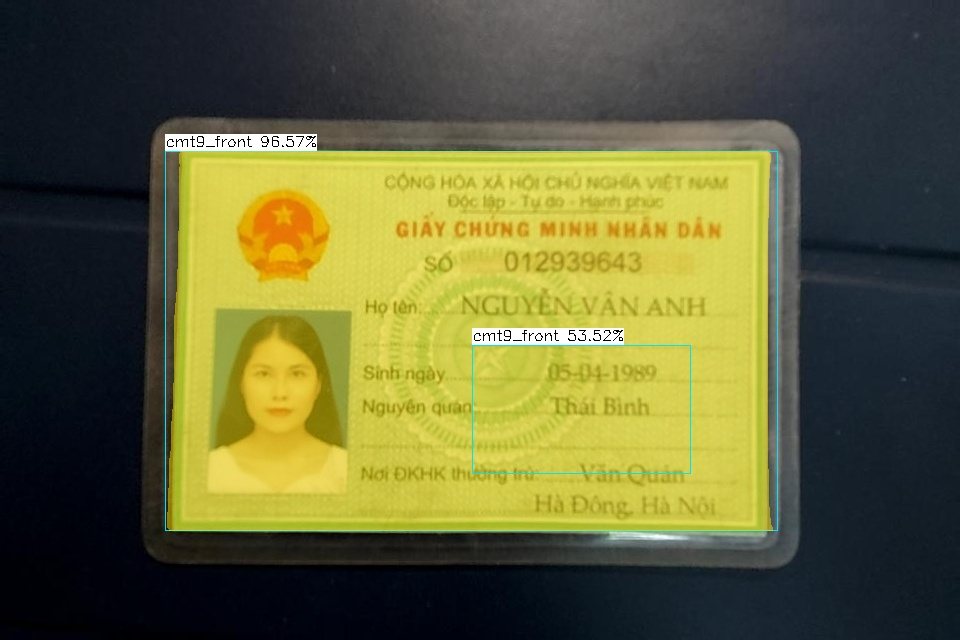

In [14]:
display.Image(filename='../output/seg/cmnd5.jpg')